In [32]:
import straxen, strax, wfsim
import os, sys, getpass
import numpy as np
import pandas as pd

from multihist import Histdd, Hist1d
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit

import zlib
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'   # enable if you have a retina display

print(strax.__file__, 'v', strax.__version__)
print(straxen.__file__, 'v', straxen.__version__)
print(wfsim.__file__, 'v', wfsim.__version__)

/opt/XENONnT/anaconda/envs/XENONnT_development/lib/python3.6/site-packages/strax/__init__.py v 0.11.0
/opt/XENONnT/anaconda/envs/XENONnT_development/lib/python3.6/site-packages/straxen/__init__.py v 0.9.0
/home/zhut/.local/lib/python3.6/site-packages/wfsim/__init__.py v 0.0.4.1


In [33]:
pwd, user = os.getcwd(), getpass.getuser()
pwd, user

('/home/zhut/WFSim_Tests/S1Bias', 'zhut')

In [35]:
run_number = np.arange(100, 120)
len(run_number)

20

# Load one dataset

In [36]:
name = str(run_number[0])

dtype = [
('event_number', 'i8'),
('event_start', 'i8'),
('run_number', 'i8'),
('s1', 'f8'),
('s1_area_fraction_top', 'f8'),
('s1_range_50p_area', 'f8'),
('s1_rise_time', 'f8'),
('s1_center_time', 'f8'),
('s1_n_hits', 'f8'),
('s1_tight_coincidence', 'i4'),
('time', 'i8'),
('endtime', 'i8'),
]

with open('/dali/lgrandi/zhut/minitrees/pax_s1b_tb/%s_HitPerPE'%name, 'rb') as f:
    data = zlib.decompress(f.read())
    data = np.frombuffer(data, dtype=dtype)

data = np.sort(data, order='time')
data = data[data['time'] > 0]

truth = pd.read_csv('/dali/lgrandi/zhut/sim/pax_data/XENON1T_MC_%s/XENON1T-%s-truth.csv'%(name, name))
truth.drop(columns=['recoil'], inplace=True)
truth = truth.to_records()
truth['time'] = truth['t_first_photon']

truth = np.sort(truth, order='time')
truth = truth[truth['time'] > 0]

ix = strax.fully_contained_in(truth, data)
m = np.where(ix>0)[0]
new_truth = truth[m]
new_data = data[ix[m]]
new_data = strax.merge_arrs([new_data, new_truth])

FileNotFoundError: [Errno 2] No such file or directory: '/dali/lgrandi/zhut/minitrees/pax_s1b_tb/100_HitPerPE'

# Use strax function to correlate data and truth

In [24]:
def add_data(rn):
    name = str(rn)
    with open('/dali/lgrandi/zhut/minitrees/pax_s1b_tb/%s_HitPerPE'%name, 'rb') as f:
        data = zlib.decompress(f.read())
        data = np.frombuffer(data, dtype=dtype)

    data = np.sort(data, order='time')
    data = data[data['time'] > 0]

    truth = pd.read_csv('/dali/lgrandi/zhut/sim/pax_data/XENON1T_MC_%s/XENON1T-%s-truth.csv'%(name, name))
    truth.drop(columns=['recoil'], inplace=True)
    truth = truth.to_records()
    truth['time'] = truth['t_first_photon']

    truth = np.sort(truth, order='time')
    truth = truth[truth['time'] > 0]
    
    ix = strax.fully_contained_in(truth, data)
    m = np.where(ix>0)[0]
    new_truth = truth[m]
    new_data = data[ix[m]]
    new_data = strax.merge_arrs([new_data, new_truth])

    return new_data

In [27]:
mh_2 = Histdd(dimensions=[('n_photon', np.linspace(0, 10, 11)-0.5),
                        ('s1', np.linspace(0, 10, 101))])

mh_3 = Histdd(dimensions=[('n_photon', np.linspace(0, 10, 11)-0.5),
                        ('s1', np.linspace(0, 10, 101))])


for rn in run_number:
    new_data = add_data(rn)
    mh_2.add(new_data[new_data['s1_tight_coincidence']==2])
    mh_3.add(new_data[new_data['s1_tight_coincidence']>=3])

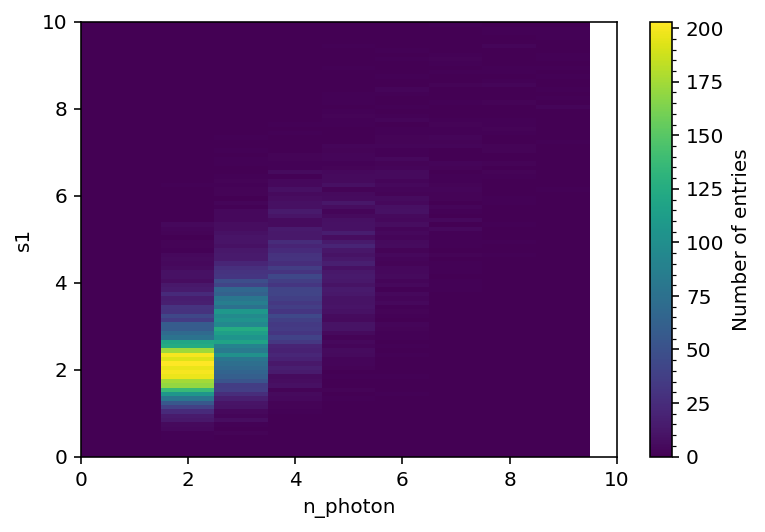

In [28]:
mh_2.plot()
plt.xlim([0, 10])
plt.ylim([0, 10])
plt.show()

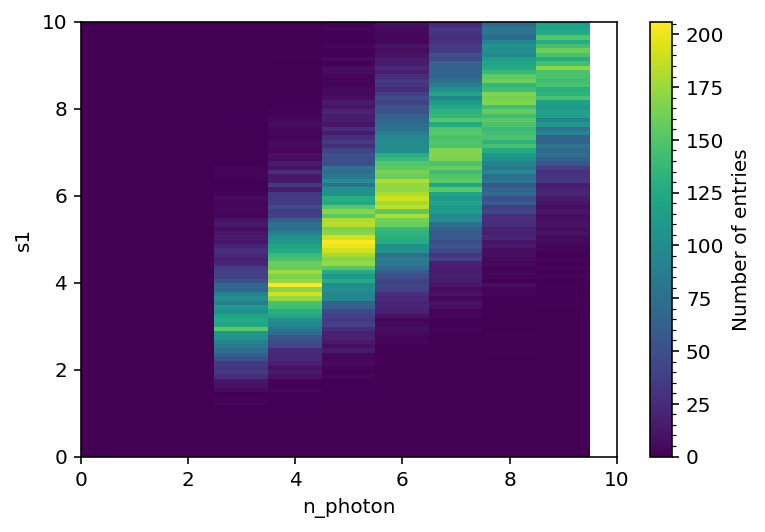

In [29]:
mh_3.plot()
plt.xlim([0, 10])
plt.ylim([0, 10])
plt.show()